In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Import Library**


In [ ]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib
import matplotlib.pyplot as plt
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle

1.1.5
TensorFlow 1.x selected.
1.15.2


# **PREDICTION MODELS**

# **ALL ACTIVITY**

## **Obtain Train and Test Data**

In [ ]:
from sklearn.utils import shuffle
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv", index_col ="ActivityName")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testn.csv", index_col ="ActivityName")
train = shuffle(train)
test = shuffle(test)
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [ ]:
train.index.unique()

Index(['LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'WALKING',
       'SITTING', 'STANDING'],
      dtype='object', name='ActivityName')

In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
ActivityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LAYING,0.279542,-0.016839,-0.107701,-0.949328,-0.974293,-0.982174,-0.948889,-0.979773,-0.981425,-0.902992,-0.541344,-0.819280,0.798239,0.661439,0.836921,-0.962866,-0.998505,-0.999776,-0.999610,-0.946010,-0.982985,-0.979731,-0.081442,-0.553095,-0.498439,-0.050932,0.010024,0.148412,-0.378844,0.406116,-0.079125,0.295431,-0.309372,0.263041,-0.245945,0.382619,-0.357005,0.021673,0.479349,0.110974,...,-0.861217,-0.936508,0.171390,-0.247678,-0.633912,-0.949432,-0.967364,-0.964411,-0.972112,-0.953479,-0.949432,-0.998819,-0.965582,-0.401123,-0.794872,0.652821,-0.518400,-0.795140,-0.952259,-0.925144,-0.918693,-0.951723,-0.975295,-0.952259,-0.997851,-0.962887,-0.414227,-0.936508,-0.628034,-0.260082,-0.752148,-0.181435,0.839043,-0.270803,-0.797416,0.860630,-0.434572,-0.525496,19,6
WALKING_DOWNSTAIRS,0.403671,0.005878,-0.123140,0.336427,-0.039233,-0.243404,0.283086,-0.095950,-0.237243,0.592669,0.230178,-0.158968,-0.003358,0.262471,0.580877,0.176663,-0.104258,-0.820336,-0.740450,-0.040275,-0.307753,-0.343384,0.203732,0.328980,-0.039090,-0.462400,0.247396,0.014352,0.127604,-0.088975,0.152931,0.170417,-0.063621,-0.248473,0.290379,0.115141,-0.256364,-0.114176,0.409248,0.089952,...,0.480595,-0.873016,-0.137363,0.015112,-0.391409,-0.212252,-0.324112,-0.184120,-0.462559,-0.915694,-0.212252,-0.674951,-0.193702,0.693983,-0.948718,0.022050,-0.589364,-0.846437,-0.360856,-0.266959,-0.260025,-0.261215,-0.878592,-0.360856,-0.751036,-0.439496,0.540773,-0.746032,-0.119042,0.044274,-0.328903,-0.624353,0.815871,-0.959198,0.512949,-0.841586,0.140195,-0.088443,26,3
WALKING_UPSTAIRS,0.254150,0.009953,-0.067768,-0.279086,-0.242984,-0.230416,-0.343064,-0.258746,-0.240845,0.128654,-0.182247,-0.303458,0.305814,0.116817,0.349099,-0.206064,-0.738731,-0.887111,-0.729568,-0.477778,-0.376344,-0.266646,0.283433,0.331366,0.323757,-0.246783,0.142818,-0.157469,0.369277,-0.125108,0.046320,0.188353,-0.014816,-0.134223,-0.030918,0.131428,0.077534,-0.384348,-0.286335,0.533052,...,0.262229,-0.904762,0.101763,0.075054,-0.214731,-0.545840,-0.319517,-0.440406,-0.245749,-0.836104,-0.545840,-0.774750,-0.695052,0.357367,-1.000000,-0.303291,0.255956,-0.058124,-0.660889,-0.703809,-0.672847,-0.696380,-0.982390,-0.660889,-0.944389,-0.627814,0.321078,-0.904762,-0.045715,-0.173623,-0.458143,0.433524,-0.570734,-0.868733,0.061118,-0.572029

In [ ]:
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

In [ ]:
GTrain = train.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING']]
GTest = test.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING']]

In [ ]:
# get X_train and X_test from csv files
X_train = GTrain
X_test = GTest

In [ ]:
training_labels = X_train.index
testing_labels = X_test.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING', 'SITTING', 'STANDING', 'LAYING'])
y_train = le.transform(training_labels)
y_test = le.transform(testing_labels)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(X_train.shape[0], X_train.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(X_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 7352 instances of data with 561 total features
Training data includes value counts of
 LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64


Testing data consists of 2947 instances of data
Testing data includes value counts of
 LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64


In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


## **Function to plot the confusion matrix**

**Labels that are useful in plotting confusion matrix**

In [ ]:
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized Confusion Matrix'
        cmap = plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **Generic function to run any model specified**

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    #untuk menyimpan hasil di berbagai tahap
    results = dict()
    
    # waktu saat model memulai
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # menghitung akurasi model secara keseluruhan
    scores = cross_val_score(model, X_train, y_train)
    avg = scores.mean()
    # menyimpan akurasi dalam hasil
    print('---------------------')
    print('|      Train Accuracy      |')
    print('---------------------')
    print('\nperformances: {}, \nAverage: {}\n\n'.format(scores, avg))


    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # menghitung akurasi model secara keseluruhan
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # dapatkan laporan klasifikasi
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # untuk hasil menambahkan model
    results['model'] = model
    
    return results

## **Method to print the gridsearch Attributes**

In [ ]:
def print_grid_search_attributes(model):
    # Estimator yang memberikan skor tertinggi di antara semua estimator yang terbentuk di GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameter yang memberikan hasil terbaik saat melakukan pencarian grid
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  jumlah pemisahan validasi silang
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Rata-rata skor silang yang divalidasi dari estimator terbaik, dari Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

## **SVM**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
#redifine labels
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.137632


---------------------
|      Train Accuracy      |
---------------------

performances: [0.96804895 0.97144799 0.96734694 0.97959184 0.9707483 ], 
Average: 0.9714368031372984


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:06.186277


---------------------
|      Accuracy      |
---------------------

    0.9504580929759077


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 438  51   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 488   3   5]
 [  0   0   0  10 384  26]
 [  0   0   0  20   0 451]]


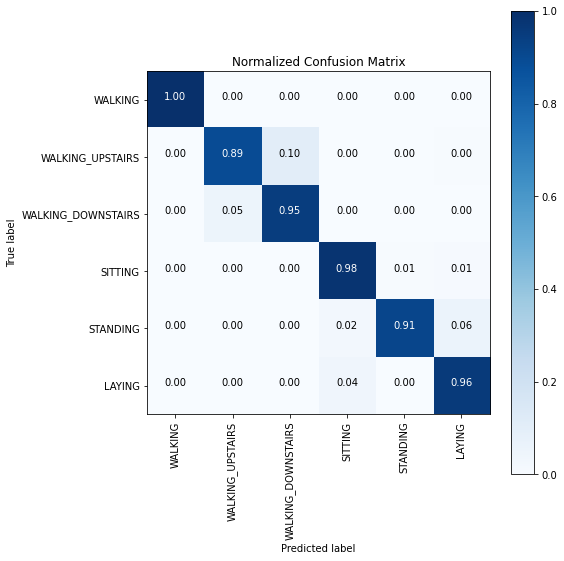

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.89      0.91       491
           2       0.91      0.95      0.93       532
           3       0.94      0.98      0.96       496
           4       0.99      0.91      0.95       420
           5       0.93      0.96      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [ ]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')
rbf_svm_results = perform_model(rbf_svm, X_train, y_train, X_test, y_test, class_labels=labels)

### SVM + Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

 baru : [ 0.001, 0.005, 0.01, 0.05, 0.0078125, 0.125, 2]}
 lama [ 0.0078125, 0.125, 2]}

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:14:33.175321


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98912305 0.98912305 0.98843537 0.99047619 0.9877551 ], 
Average: 0.988982551552232


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.154516


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


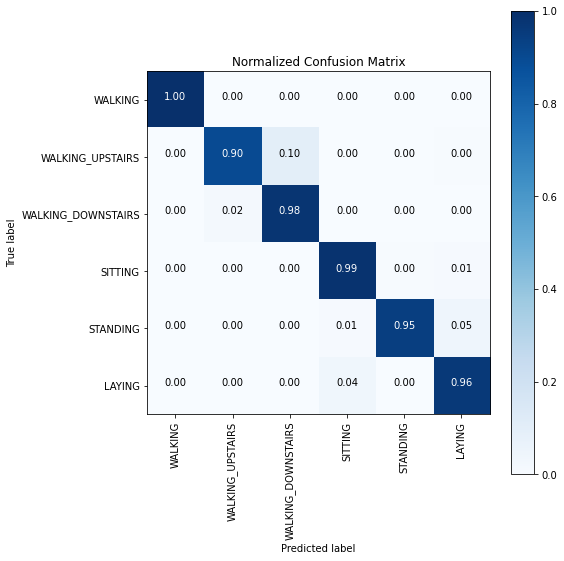

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.90      0.93       491
           2       0.92      0.98      0.95       532
           3       0.96      0.99      0.97       496
           4       0.99      0.95      0.97       420
           5       0.95      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

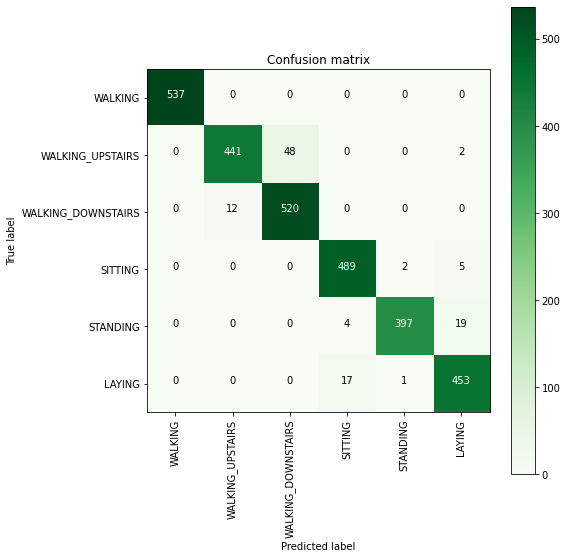

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.988982551552232



### SVM + Grid Search per parameter

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:25.331728


---------------------
|      Train Accuracy      |
---------------------

performances: [0.9789259  0.97960571 0.97959184 0.98435374 0.98163265], 
Average: 0.980821968488279


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:04.588899


---------------------
|      Accuracy      |
---------------------

    0.9524940617577197


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 440  49   0   0   2]
 [  0  23 509   0   0   0]
 [  0   0   0 486   3   7]
 [  0   0   0   9 386  25]
 [  0   0   0  22   0 449]]


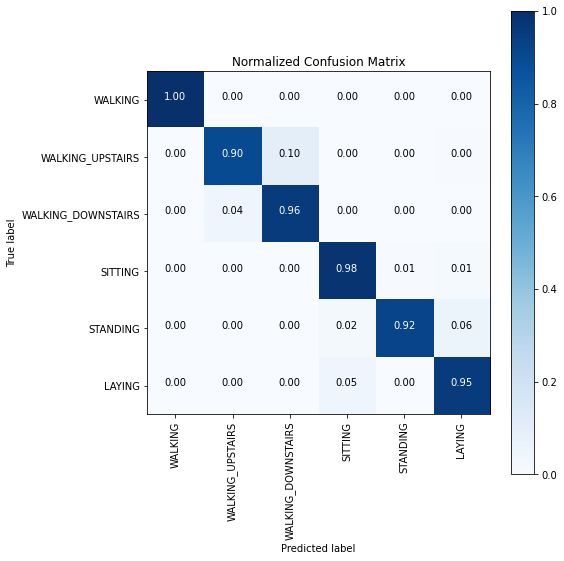

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.95      0.90      0.92       491
           2       0.91      0.96      0.93       532
           3       0.94      0.98      0.96       496
           4       0.99      0.92      0.95       420
           5       0.93      0.95      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:17.114762


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98640381 0.98504419 0.98639456 0.98979592 0.98503401], 
Average: 0.9865344968714883


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.343276


---------------------
|      Accuracy      |
---------------------

    0.9619952494061758


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 439  50   0   0   2]
 [  0  10 522   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   5 394  21]
 [  0   0   0  15   2 454]]


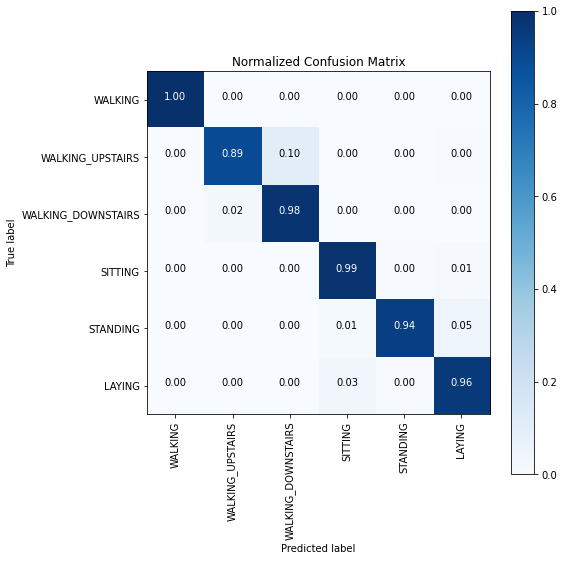

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.89      0.93       491
           2       0.91      0.98      0.95       532
           3       0.96      0.99      0.97       496
           4       0.99      0.94      0.96       420
           5       0.94      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[8],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:16.073123


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98912305 0.98912305 0.98843537 0.99047619 0.9877551 ], 
Average: 0.988982551552232


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.038712


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


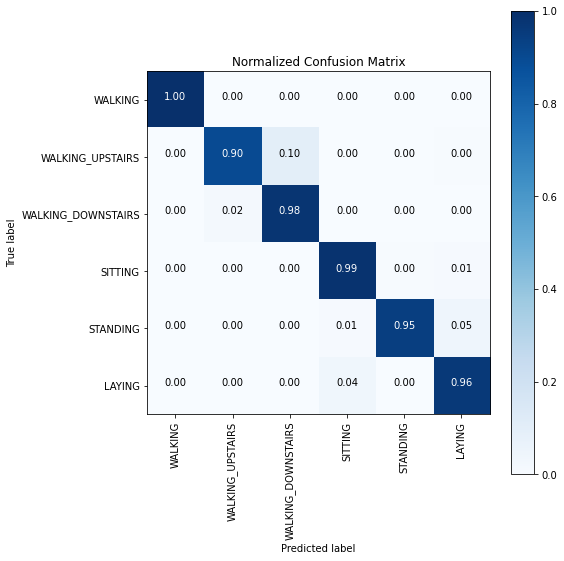

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.90      0.93       491
           2       0.92      0.98      0.95       532
           3       0.96      0.99      0.97       496
           4       0.99      0.95      0.97       420
           5       0.95      0.96      0.95       471

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[16],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:38.328974


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97620666 0.98368457 0.97619048 0.98163265 0.97482993], 
Average: 0.9785088583359924


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:12.665548


---------------------
|      Accuracy      |
---------------------

    0.9416355615880556


--------------------
| Confusion Matrix |
--------------------

 [[525   0   0   0  12   0]
 [  0 447  31   0  13   0]
 [  0  13 508   0  11   0]
 [  0   0   0 456  40   0]
 [  0   0   0   6 388  26]
 [  0   0   0   4  16 451]]


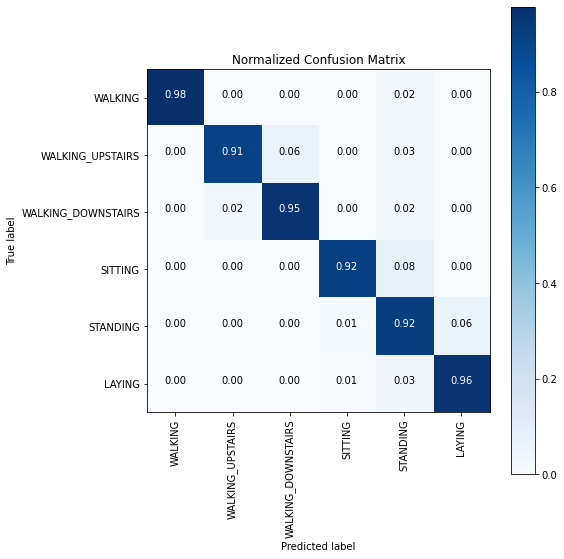

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.97      0.91      0.94       491
           2       0.94      0.95      0.95       532
           3       0.98      0.92      0.95       496
           4       0.81      0.92      0.86       420
           5       0.95      0.96      0.95       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:15.632293


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97620666 0.98368457 0.97619048 0.98231293 0.9755102 ], 
Average: 0.9787809671795298


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:12.513838


---------------------
|      Accuracy      |
---------------------

    0.9423142178486597


--------------------
| Confusion Matrix |
--------------------

 [[525   0   0   0  12   0]
 [  0 447  31   0  13   0]
 [  0  11 510   0  11   0]
 [  0   0   0 456  40   0]
 [  0   0   0   6 388  26]
 [  0   0   0   4  16 451]]


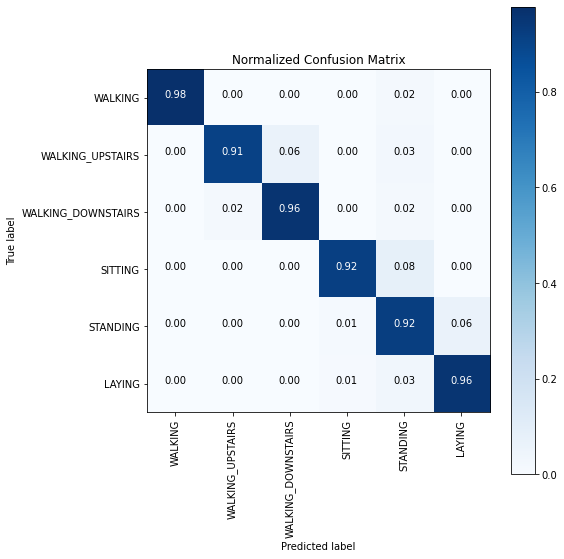

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.98      0.91      0.94       491
           2       0.94      0.96      0.95       532
           3       0.98      0.92      0.95       496
           4       0.81      0.92      0.86       420
           5       0.95      0.96      0.95       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[8],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:16.565932


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97620666 0.98368457 0.97619048 0.98231293 0.9755102 ], 
Average: 0.9787809671795298


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:12.482514


---------------------
|      Accuracy      |
---------------------

    0.9423142178486597


--------------------
| Confusion Matrix |
--------------------

 [[525   0   0   0  12   0]
 [  0 447  31   0  13   0]
 [  0  11 510   0  11   0]
 [  0   0   0 456  40   0]
 [  0   0   0   6 388  26]
 [  0   0   0   4  16 451]]


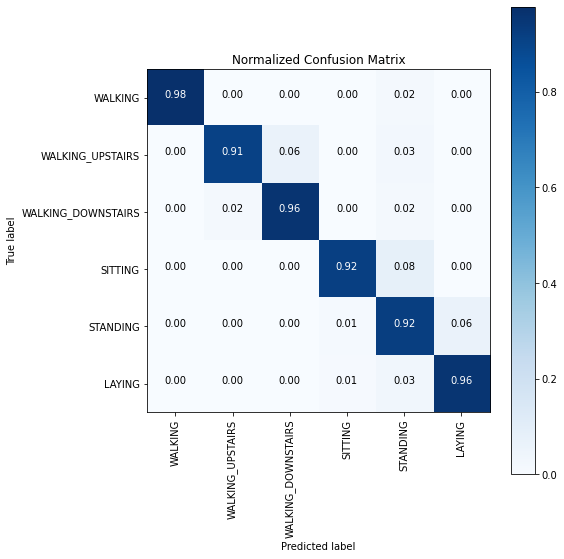

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.98      0.91      0.94       491
           2       0.94      0.96      0.95       532
           3       0.98      0.92      0.95       496
           4       0.81      0.92      0.86       420
           5       0.95      0.96      0.95       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[16],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## **Accuracy**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('SVM                 : {:.04}%       {:.04}%'.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                  100-(rbf_svm_grid_results['accuracy'] * 100)))


# **DINAMIC ACTIVITY**

## **Obtain Train and Test Data**

In [ ]:
from sklearn.utils import shuffle
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv", index_col ="ActivityName")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testn.csv", index_col ="ActivityName")
train = shuffle(train)
test = shuffle(test)
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [ ]:
train.index.unique()

Index(['WALKING', 'STANDING', 'LAYING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', 'SITTING'],
      dtype='object', name='ActivityName')

In [ ]:
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

In [ ]:
DTrain = train.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']]
DTest = test.loc[['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING']]

In [ ]:
# get X_train and X_test from csv files
X_train = DTrain
X_test = DTest

In [ ]:
training_labels = X_train.index
testing_labels = X_test.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING'])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
y_train = le.transform(training_labels)
y_test = le.transform(testing_labels)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(X_train.shape[0], X_train.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(X_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 3285 instances of data with 561 total features
Training data includes value counts of
 WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64


Testing data consists of 1387 instances of data
Testing data includes value counts of
 WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: ActivityName, dtype: int64


In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((3285, 561),(3285,))
X_test  and y_test  : ((1387, 561),(1387,))


## **SVM**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
#redifine labels
labels=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:02.238010


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.99391172 0.99695586 1.         0.99086758], 
Average: 0.9960426179604263


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.962924


---------------------
|      Accuracy      |
---------------------

    0.9538572458543619


--------------------
| Confusion Matrix |
--------------------

 [[487   3   6]
 [ 10 385  25]
 [ 20   0 451]]


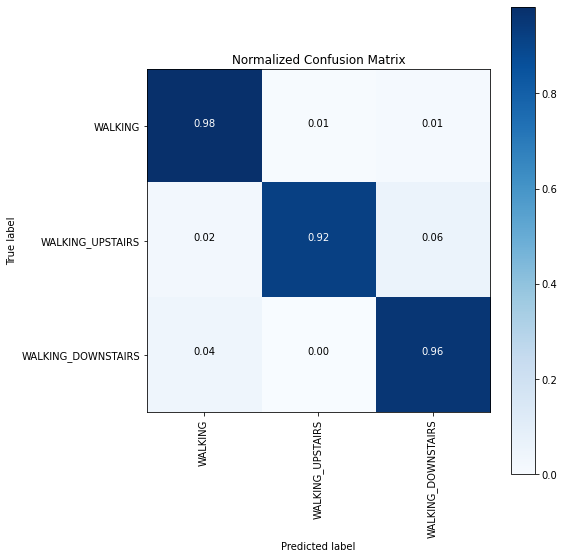

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       496
           1       0.99      0.92      0.95       420
           2       0.94      0.96      0.95       471

    accuracy                           0.95      1387
   macro avg       0.96      0.95      0.95      1387
weighted avg       0.96      0.95      0.95      1387



In [ ]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')
rbf_svm_results = perform_model(rbf_svm, X_train, y_train, X_test, y_test, class_labels=labels)

### **SVM + Grid Search**

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

baru 0.001, 0.005, 0.01, 0.05, 0.0078125, 0.125, 2
lama 0.0078125, 0.125, 2

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:34.751447


---------------------
|      Train Accuracy      |
---------------------

performances: [1.         0.99847793 1.         1.         1.        ], 
Average: 0.9996955859969558


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.540798


---------------------
|      Accuracy      |
---------------------

    0.9639509733237203


--------------------
| Confusion Matrix |
--------------------

 [[489   2   5]
 [  5 394  21]
 [ 15   2 454]]


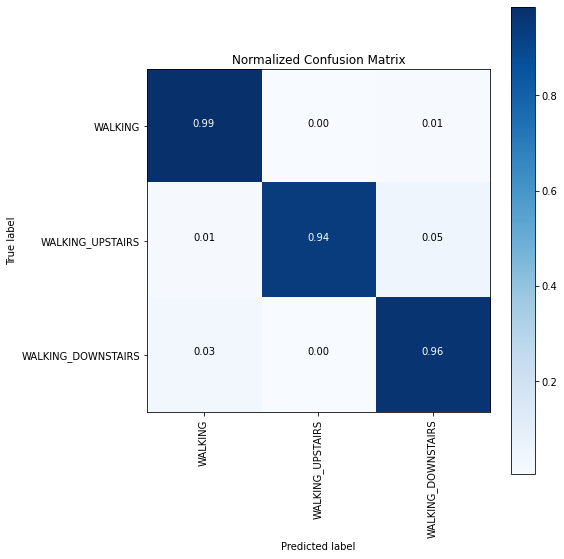

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       496
           1       0.99      0.94      0.96       420
           2       0.95      0.96      0.95       471

    accuracy                           0.96      1387
   macro avg       0.97      0.96      0.96      1387
weighted avg       0.96      0.96      0.96      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

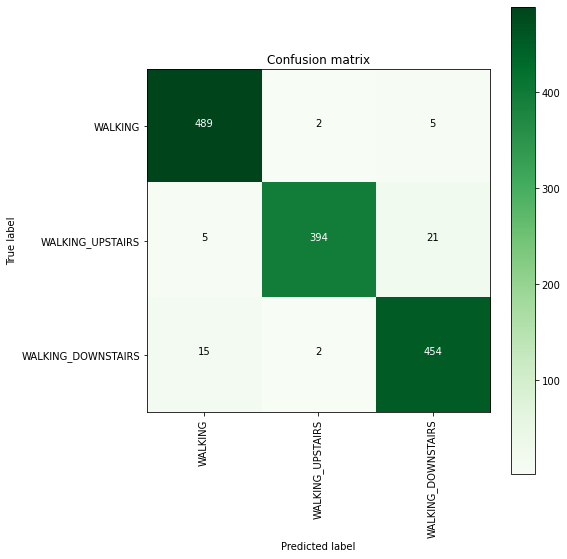

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9996955859969558



### SVM + Grid Search per parameter

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:06.422487


---------------------
|      Train Accuracy      |
---------------------

performances: [1.         0.99847793 0.99847793 1.         0.99543379], 
Average: 0.9984779299847792


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.745025


---------------------
|      Accuracy      |
---------------------

    0.9524152847873107


--------------------
| Confusion Matrix |
--------------------

 [[486   3   7]
 [  9 386  25]
 [ 22   0 449]]


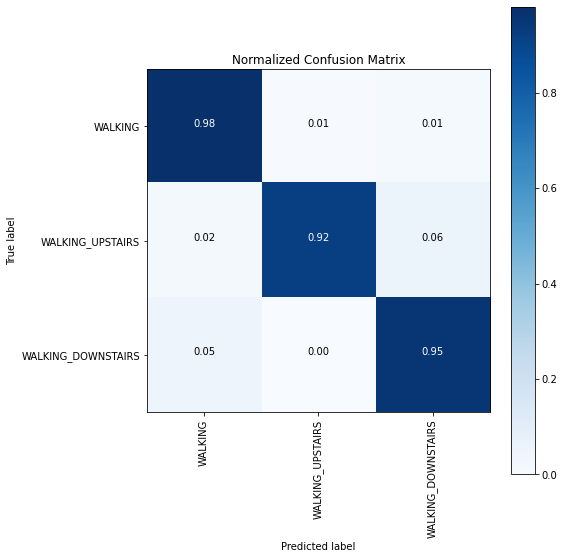

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       496
           1       0.99      0.92      0.95       420
           2       0.93      0.95      0.94       471

    accuracy                           0.95      1387
   macro avg       0.96      0.95      0.95      1387
weighted avg       0.95      0.95      0.95      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.661758


---------------------
|      Train Accuracy      |
---------------------

performances: [1.         0.99847793 1.         1.         1.        ], 
Average: 0.9996955859969558


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.554125


---------------------
|      Accuracy      |
---------------------

    0.9639509733237203


--------------------
| Confusion Matrix |
--------------------

 [[489   2   5]
 [  5 394  21]
 [ 15   2 454]]


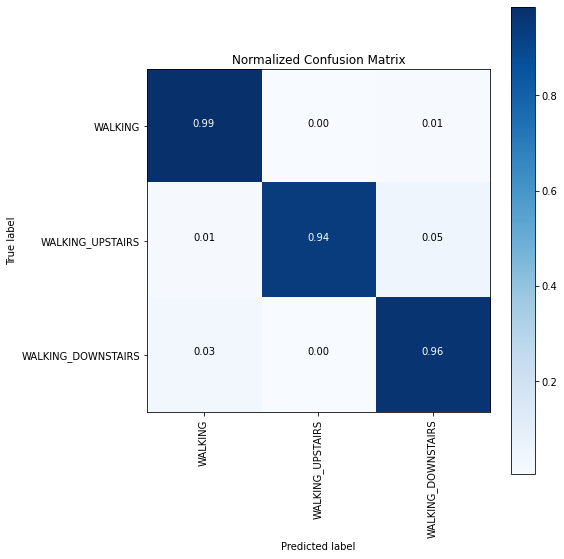

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       496
           1       0.99      0.94      0.96       420
           2       0.95      0.96      0.95       471

    accuracy                           0.96      1387
   macro avg       0.97      0.96      0.96      1387
weighted avg       0.96      0.96      0.96      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[8],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:04.603266


---------------------
|      Train Accuracy      |
---------------------

performances: [1.         0.99847793 1.         1.         1.        ], 
Average: 0.9996955859969558


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.526963


---------------------
|      Accuracy      |
---------------------

    0.9653929343907715


--------------------
| Confusion Matrix |
--------------------

 [[489   2   5]
 [  4 397  19]
 [ 17   1 453]]


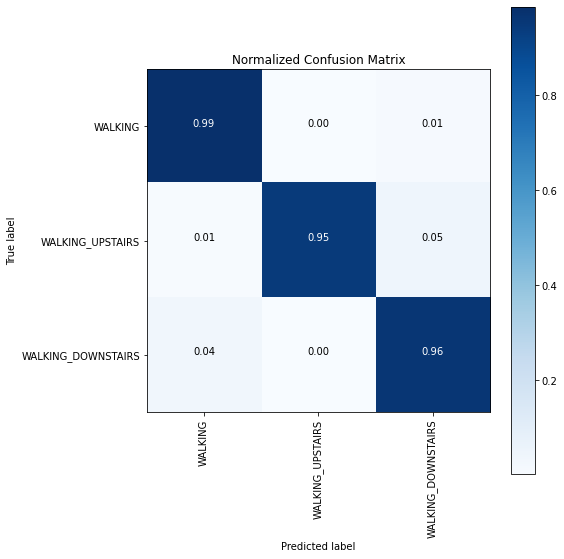

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       496
           1       0.99      0.95      0.97       420
           2       0.95      0.96      0.96       471

    accuracy                           0.97      1387
   macro avg       0.97      0.96      0.97      1387
weighted avg       0.97      0.97      0.97      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[16],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:38.305477


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.98630137 0.99238965 0.99238965 0.98934551], 
Average: 0.9917808219178081


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.925937


---------------------
|      Accuracy      |
---------------------

    0.9336697909156453


--------------------
| Confusion Matrix |
--------------------

 [[456  40   0]
 [  6 388  26]
 [  4  16 451]]


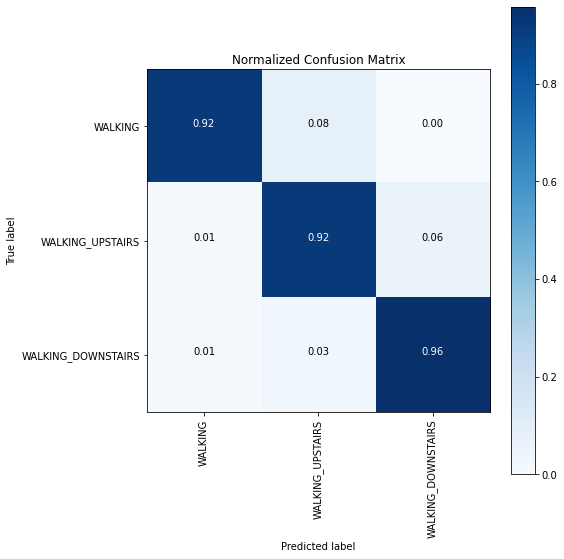

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       496
           1       0.87      0.92      0.90       420
           2       0.95      0.96      0.95       471

    accuracy                           0.93      1387
   macro avg       0.93      0.93      0.93      1387
weighted avg       0.94      0.93      0.93      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:38.161611


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.98630137 0.99238965 0.99238965 0.98934551], 
Average: 0.9917808219178081


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.875226


---------------------
|      Accuracy      |
---------------------

    0.9336697909156453


--------------------
| Confusion Matrix |
--------------------

 [[456  40   0]
 [  6 388  26]
 [  4  16 451]]


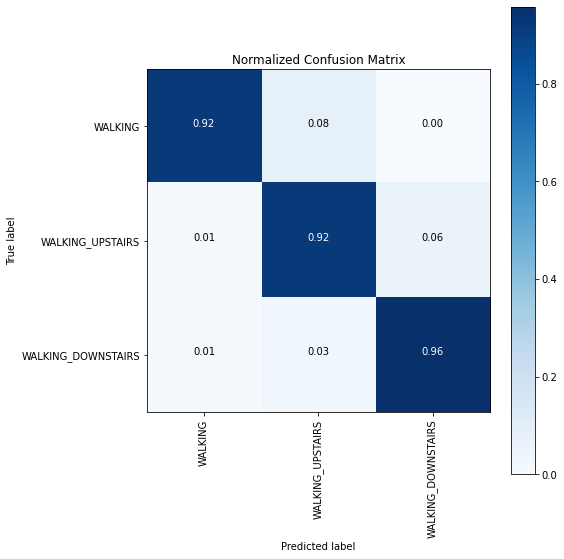

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       496
           1       0.87      0.92      0.90       420
           2       0.95      0.96      0.95       471

    accuracy                           0.93      1387
   macro avg       0.93      0.93      0.93      1387
weighted avg       0.94      0.93      0.93      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[8],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:38.207404


---------------------
|      Train Accuracy      |
---------------------

performances: [0.99847793 0.98630137 0.99238965 0.99238965 0.98934551], 
Average: 0.9917808219178081


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.928971


---------------------
|      Accuracy      |
---------------------

    0.9336697909156453


--------------------
| Confusion Matrix |
--------------------

 [[456  40   0]
 [  6 388  26]
 [  4  16 451]]


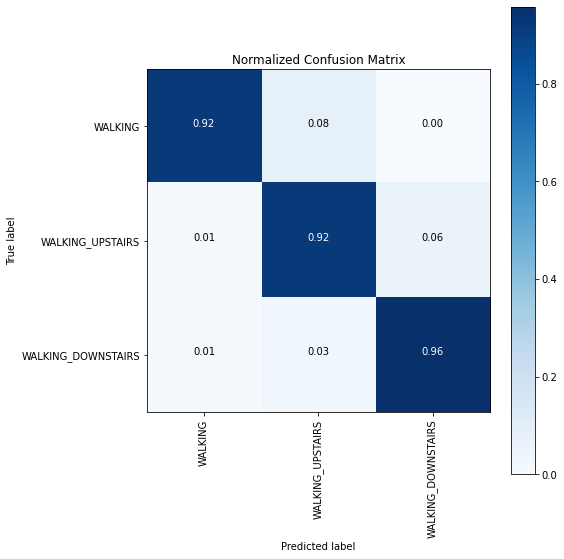

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       496
           1       0.87      0.92      0.90       420
           2       0.95      0.96      0.95       471

    accuracy                           0.93      1387
   macro avg       0.93      0.93      0.93      1387
weighted avg       0.94      0.93      0.93      1387



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[16],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## **Accuracy DINAMIC ACTIVITY**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('SVM                  : {:.04}%       {:.04}%'.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                  100-(rbf_svm_grid_results['accuracy'] * 100)))


# **STATIC ACTIVITY**

## **Obtain Train and Test Data**

In [ ]:
from sklearn.utils import shuffle
train = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/trainn.csv", index_col ="ActivityName")
test = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Dataset fresh/UCIHAR/csv_files/testn.csv", index_col ="ActivityName")
train = shuffle(train)
test = shuffle(test)
print(train.shape, test.shape)

(7352, 563) (2947, 563)


In [ ]:
train.index.unique()

Index(['WALKING_UPSTAIRS', 'STANDING', 'WALKING', 'LAYING',
       'WALKING_DOWNSTAIRS', 'SITTING'],
      dtype='object', name='ActivityName')

In [ ]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
ActivityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WALKING_UPSTAIRS,0.407696,-0.000511,-0.165534,-0.152683,0.417725,0.786254,-0.217227,0.399351,0.636665,0.537230,0.330198,0.472763,0.094347,-0.122837,-0.500909,0.278195,-0.636466,-0.612965,0.414291,-0.254667,0.120689,0.395348,0.530285,0.225366,0.172540,-0.449584,0.443346,-0.469702,0.476347,-0.037010,-0.207901,0.560727,-0.267975,-0.389839,0.239160,-0.107258,0.094784,-0.234679,-0.522300,-0.067920,...,0.556773,-0.904762,-0.194164,-0.410683,-0.768331,0.261234,0.448829,0.638277,0.050986,-0.809723,0.261234,0.177309,0.119990,0.765932,-0.846154,-0.332042,-0.479327,-0.828461,-0.394495,-0.526303,-0.396974,-0.640141,-0.561802,-0.394495,-0.837021,-0.304161,0.510211,-0.968254,0.048766,-0.630347,-0.902232,-0.625374,0.557287,-0.915067,0.088278,-0.391124,0.319937,0.376003,14,2
STANDING,0.283341,-0.011380,-0.084487,-0.985699,-0.976139,-0.966983,-0.987847,-0.975566,-0.967550,-0.922932,-0.556736,-0.773985,0.834342,0.689514,0.843165,-0.973570,-0.999830,-0.999741,-0.998217,-0.990227,-0.977544,-0.971514,-0.304246,-0.351219,-0.089959,-0.111554,0.225706,-0.229088,0.388099,-0.039032,0.028044,0.120951,-0.176138,-0.135541,0.107712,-0.017319,-0.085880,-0.204336,-0.372624,-0.307578,...,-0.940965,-1.000000,0.407163,-0.346005,-0.658080,-0.984485,-0.979342,-0.981311,-0.976759,-0.998815,-0.984485,-0.999716,-0.986704,-0.693158,-0.948718,-0.164218,0.032133,-0.268675,-0.991803,-0.993160,-0.991837,-0.994892,-0.985961,-0.991803,-0.999947,-0.990379,-0.923452,-0.968254,0.170381,-0.550907,-0.865119,0.045148,0.317484,-0.916593,0.356158,-0.798883,0.153576,0.151297,7,5
STANDING,0.287065,-0.048632,-0.092123,-0.966236,-0.916249,-0.870854,-0.971598,-0.908982,-0.865141,-0.892043,-0.558652,-0.713860,0.821528,0.645006,0.809263,-0.913876,-0.999270,-0.996561,-0.990506,-0.982328,-0.911232,-0.859057,-0.145622,-0.689577,-0.076908,-0.130679,0.042163,-0.041040,0.063530,0.080529,-0.161572,0.344834,-0.342173,-0.172298,0.107037,-0.073951,-0.104082,-0.218275,0.767152,0.013519,...,-1.000000,-1.000000,0.407075,-0.514096,-0.830549,-0.976205,-0.969625,-0.969104,-0.969637,-0.998415,-0.976205,-0.999418,-0.976466,-0.574753,-0.948718,-0.304078,-0.201492,-0.532562,-0.987729,-0.991325,-0.989779,-0.992816,-0.993239,-0.987729,-0.999906,-0.987073,-0.895847,-1.000000,0.260533,-0.615301,-0.849776,-0.052164,0.376438,-0.514316,-0.458638,-0.778630,0.131

In [ ]:
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

In [ ]:
STrain = train.loc[['SITTING', 'STANDING', 'LAYING']]
STest = test.loc[['SITTING', 'STANDING', 'LAYING']]

In [ ]:
# get X_train and X_test from csv files
X_train = STrain
X_test = STest

In [ ]:
training_labels = X_train.index
testing_labels = X_test.index

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(['SITTING', 'STANDING', 'LAYING'])
#le = le.fit(["1", "2", "3", "4", "5", "6"])
y_train = le.transform(training_labels)
y_test = le.transform(testing_labels)

In [ ]:
print ("Training data consists of {} instances of data with {} total features".format(X_train.shape[0], X_train.shape[1]))
print ("Training data includes value counts of\n",training_labels.value_counts())
print ("\n")
print ("Testing data consists of {} instances of data".format(X_test.shape[0]))
print ("Testing data includes value counts of\n",testing_labels.value_counts())

Training data consists of 4067 instances of data with 561 total features
Training data includes value counts of
 LAYING      1407
STANDING    1374
SITTING     1286
Name: ActivityName, dtype: int64


Testing data consists of 1560 instances of data
Testing data includes value counts of
 LAYING      537
STANDING    532
SITTING     491
Name: ActivityName, dtype: int64


In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((4067, 561),(4067,))
X_test  and y_test  : ((1560, 561),(1560,))


## **SVM**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

#redifine labels
labels=["SITTING", "STANDING", "LAYING"]

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.880142


---------------------
|      Train Accuracy      |
---------------------

performances: [0.95700246 0.96191646 0.93849938 0.95940959 0.9495695 ], 
Average: 0.9532794787407333


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.875779


---------------------
|      Accuracy      |
---------------------

    0.9467948717948718


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 438  53]
 [  0  30 502]]


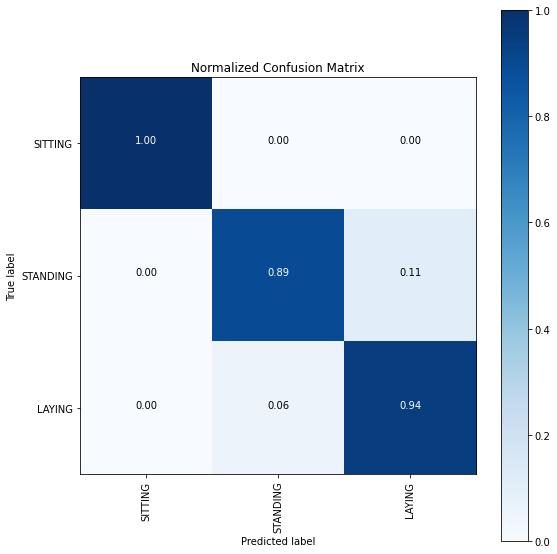

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.89      0.91       491
           2       0.90      0.94      0.92       532

    accuracy                           0.95      1560
   macro avg       0.95      0.95      0.95      1560
weighted avg       0.95      0.95      0.95      1560



In [ ]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')
rbf_svm_results = perform_model(rbf_svm, X_train, y_train, X_test, y_test, class_labels=labels)

### SVM + Grid Search

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

baru 0.001, 0.005, 0.01, 0.05, 0.0078125, 0.125, 2
lama 0.0078125, 0.125, 2

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:41.329830


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98402948 0.98525799 0.97539975 0.98769988 0.97662977], 
Average: 0.9818033733162883


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.908955


---------------------
|      Accuracy      |
---------------------

    0.9608974358974359


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 442  49]
 [  0  12 520]]


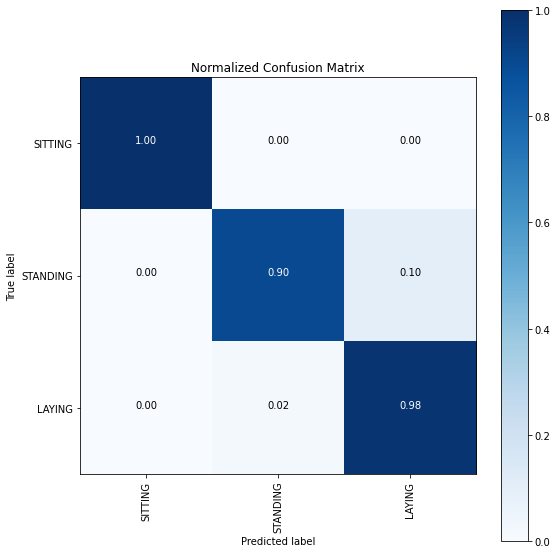

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.90      0.94       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

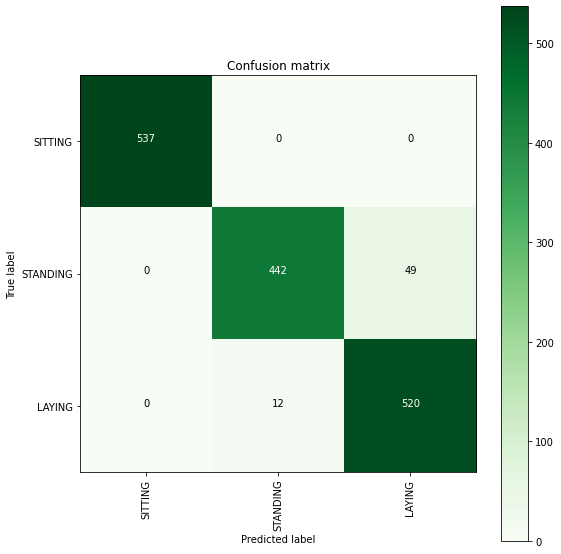

In [ ]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [ ]:

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9818033733162883



### SVM + Grid Search per parameter

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.461974


---------------------
|      Train Accuracy      |
---------------------

performances: [0.96928747 0.97665848 0.95202952 0.97170972 0.95940959], 
Average: 0.9658189554868523


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.466402


---------------------
|      Accuracy      |
---------------------

    0.9532051282051283


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 441  50]
 [  0  23 509]]


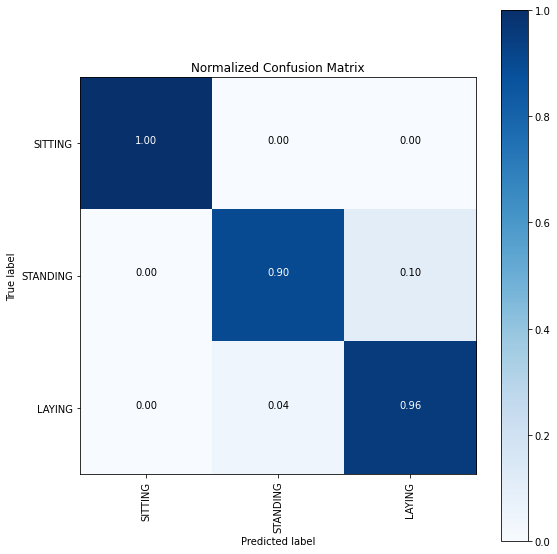

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.95      0.90      0.92       491
           2       0.91      0.96      0.93       532

    accuracy                           0.95      1560
   macro avg       0.95      0.95      0.95      1560
weighted avg       0.95      0.95      0.95      1560



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.743846


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97542998 0.99140049 0.97785978 0.97662977 0.97170972], 
Average: 0.9786059457646173


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.034369


---------------------
|      Accuracy      |
---------------------

    0.9608974358974359


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 440  51]
 [  0  10 522]]


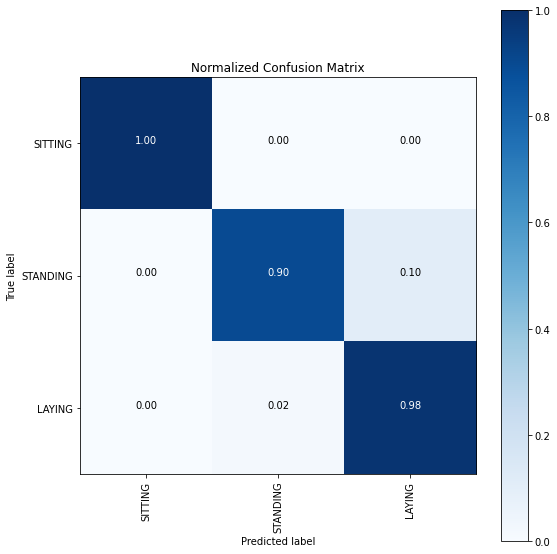

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.90      0.94       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[8],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.555867


---------------------
|      Train Accuracy      |
---------------------

performances: [0.98402948 0.98525799 0.97539975 0.98769988 0.97662977], 
Average: 0.9818033733162883


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.919075


---------------------
|      Accuracy      |
---------------------

    0.9608974358974359


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [  0 442  49]
 [  0  12 520]]


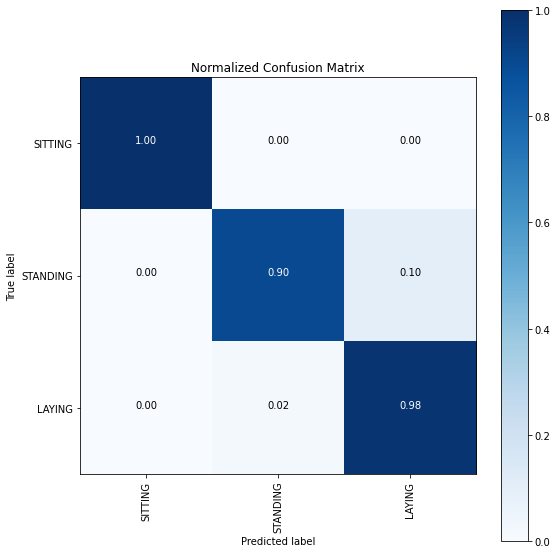

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.97      0.90      0.94       491
           2       0.91      0.98      0.94       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[16],\
              'gamma': [ 0.0078125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:36.622307


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97911548 0.98894349 0.9704797  0.98277983 0.98154982], 
Average: 0.98057366323049


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.263954


---------------------
|      Accuracy      |
---------------------

    0.9596153846153846


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [ 10 450  31]
 [  7  15 510]]


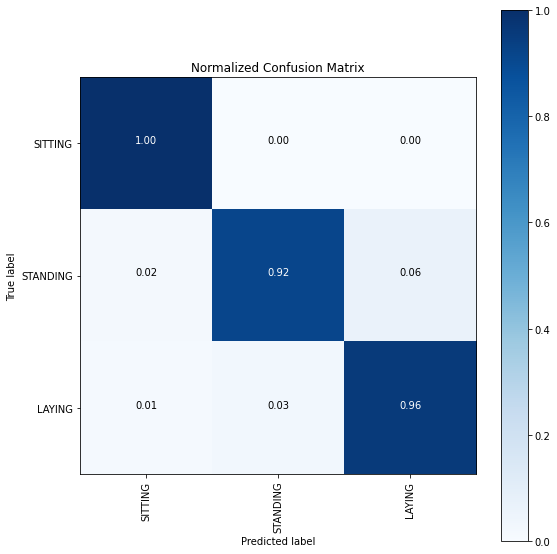

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       537
           1       0.97      0.92      0.94       491
           2       0.94      0.96      0.95       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:36.352084


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97788698 0.98894349 0.97170972 0.98277983 0.98277983], 
Average: 0.9808199679048387


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:03.203758


---------------------
|      Accuracy      |
---------------------

    0.9608974358974359


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0]
 [ 10 450  31]
 [  7  13 512]]


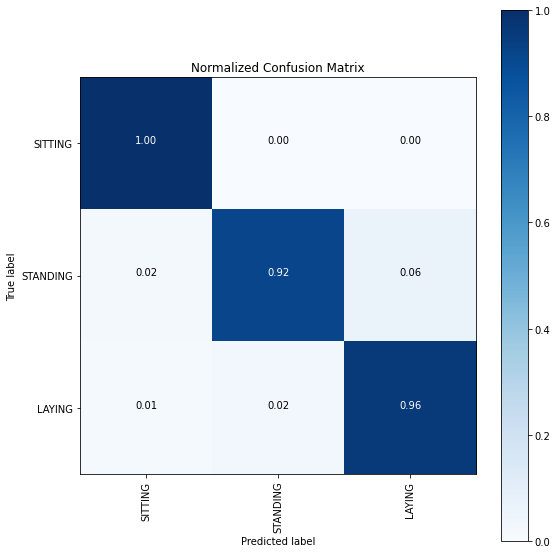

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       537
           1       0.97      0.92      0.94       491
           2       0.94      0.96      0.95       532

    accuracy                           0.96      1560
   macro avg       0.96      0.96      0.96      1560
weighted avg       0.96      0.96      0.96      1560



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[8],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:31.037505


---------------------
|      Train Accuracy      |
---------------------

performances: [0.97348742 0.97824609 0.97959184 0.97823129 0.98231293], 
Average: 0.9783739138075352


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:13.192827


---------------------
|      Accuracy      |
---------------------

    0.9423142178486597


--------------------
| Confusion Matrix |
--------------------

 [[525   0   0   0  12   0]
 [  0 447  31   0  13   0]
 [  0  11 510   0  11   0]
 [  0   0   0 456  40   0]
 [  0   0   0   6 388  26]
 [  0   0   0   4  16 451]]


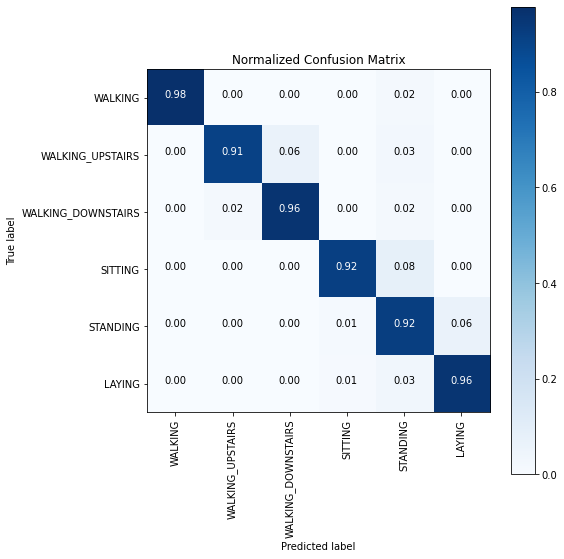

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       537
           1       0.98      0.91      0.94       491
           2       0.94      0.96      0.95       532
           3       0.98      0.92      0.95       496
           4       0.81      0.92      0.86       420
           5       0.95      0.96      0.95       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[16],\
              'gamma': [ 0.125]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=8)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

## **Accuracy STATIC ACTIVITY**

In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('SVM                  : {:.04}%       {:.04}%'.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                  100-(rbf_svm_grid_results['accuracy'] * 100)))
